# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [31]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [32]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


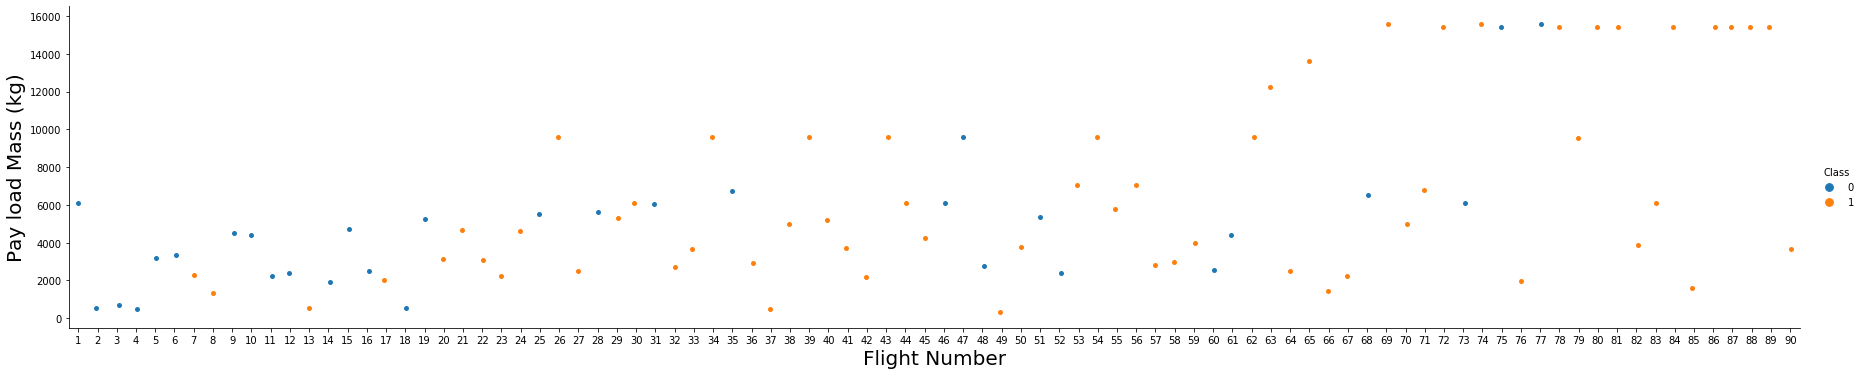

In [3]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, aspect = 5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Pay load Mass (kg)', fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


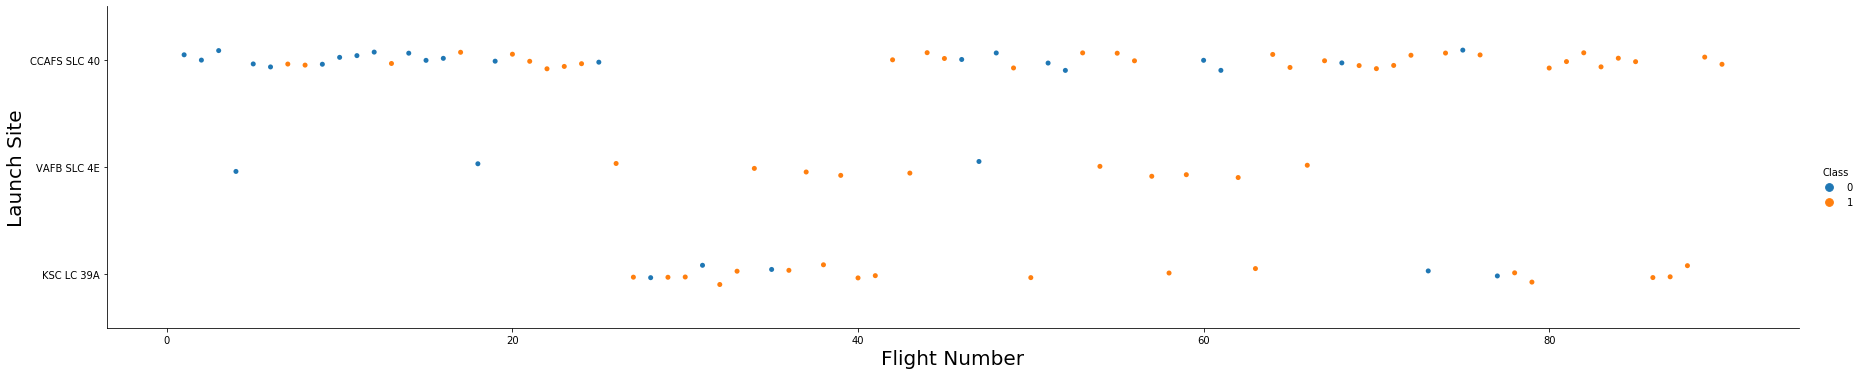

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect = 5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


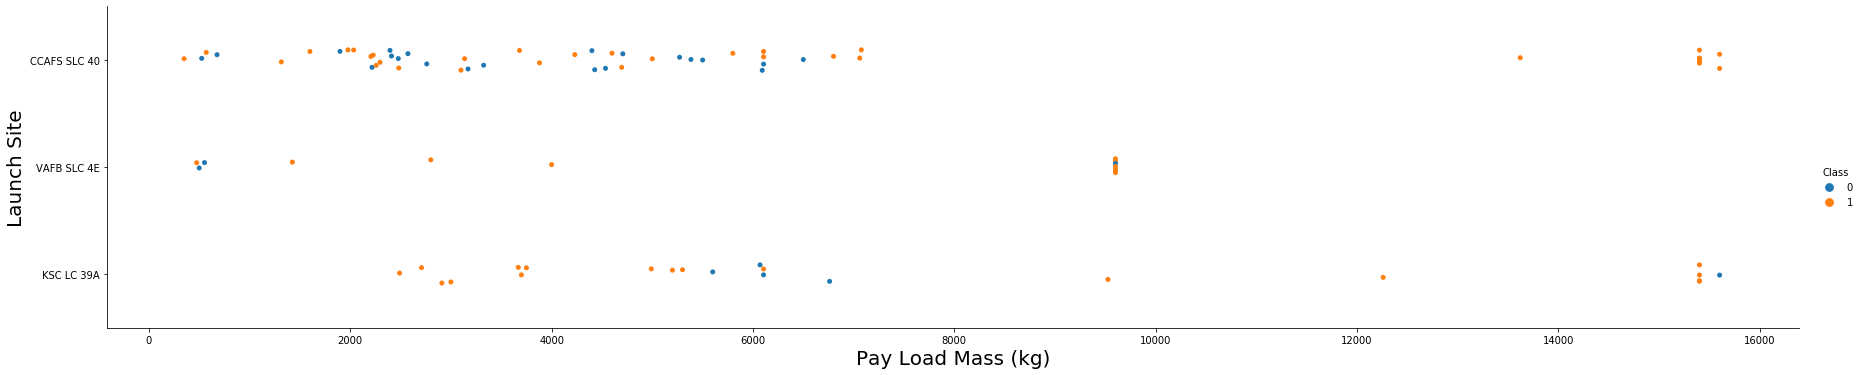

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df, aspect = 5)
plt.xlabel('Pay Load Mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [52]:
success_rate = df.groupby(['Orbit'])['Class'].mean()

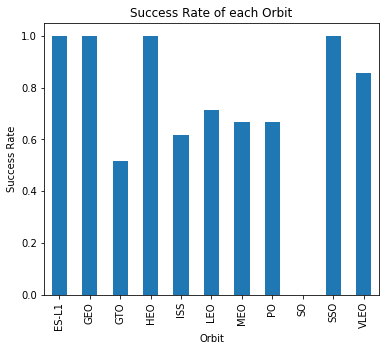

In [53]:
success_rate.plot(kind='bar', title='Success Rate of each Orbit', ylabel='Success Rate',
         xlabel='Orbit', figsize=(6, 5))

#### TASK 4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

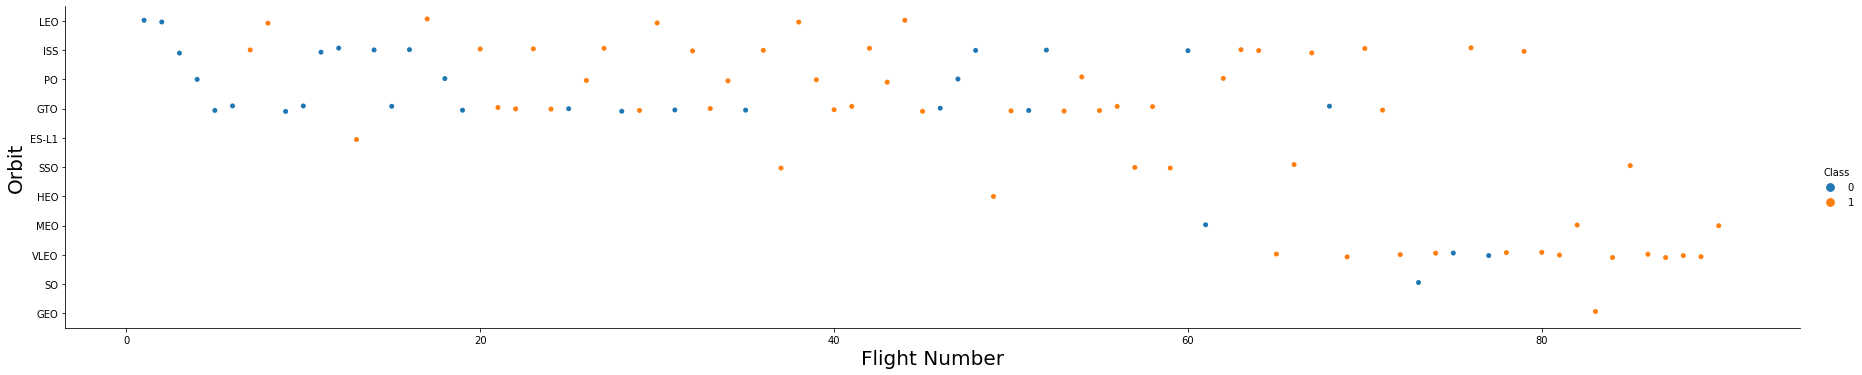

In [55]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y='Orbit', x='FlightNumber', hue='Class', data=df, aspect = 5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

#### TASK 5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

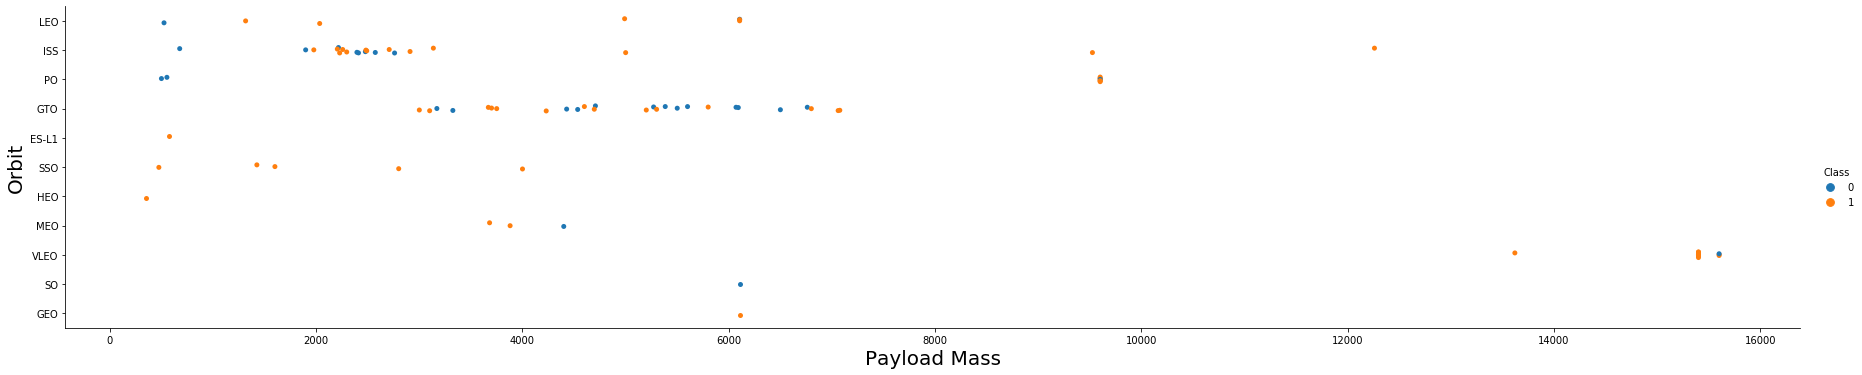

In [57]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class valuesns.catplot(y='Orbit', x='FlightNumber', hue='Class', data=df, aspect = 5)
sns.catplot(y='Orbit', x='PayloadMass', hue='Class', data=df, aspect = 5)
plt.xlabel('Payload Mass', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.newdf

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

#### TASK 6: Visualize the launch success yearly trend¶

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [58]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [59]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
success_rate_year = df.groupby([''])['Class'].mean()
success_rate.plot(kind='bar', title='Success Rate of each Orbit', ylabel='Success Rate',
         xlabel='Orbit', figsize=(6, 5))

you can observe that the sucess rate since 2013 kept increasing till 2020

#### Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

#### TASK 7: Create dummy variables to categorical columns

Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [64]:
one_code_Orbit = pd.get_dummies(df.Orbit).iloc[:, 1:]
one_code_LaunchSite = pd.get_dummies(df.LaunchSite).iloc[:, 1:]
one_code_LandingPad = pd.get_dummies(df.LandingPad).iloc[:, 1:]
one_code_Serial = pd.get_dummies(df.Serial).iloc[:, 1:]

In [65]:
features_one_hot = pd.concat([df, one_code_orbit,one_code_LaunchSite, one_code_LandingPad, one_code_Serial ], axis=1)
features_one_hot

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,...,0,0,0,0,0,0,0,0,1,0
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,...,0,0,0,0,0,0,1,0,0,0
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,...,0,0,0,1,0,0,0,0,0,0
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,...,0,0,0,0,0,0,0,0,1,0


#### TASK 8: Cast all numeric columns to float64

Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64

In [82]:
features_one_hot.dtypes
features_one_hot.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO',
       'VLEO', 'KSC LC 39A', 'VAFB SLC 4E', '5e9e3032383ecb554034e7c9',
       '5e9e3032383ecb6bb234e7ca', '5e9e3032383ecb761634e7cb',
       '5e9e3033383ecbb9e534e7cc', 'B0005', 'B0007', 'B1003', 'B1004', 'B1005',
       'B1006', 'B1007', 'B1008', 'B1010', 'B1011', 'B1012', 'B1013', 'B1015',
       'B1016', 'B1017', 'B1018', 'B1019', 'B1020', 'B1021', 'B1022', 'B1023',
       'B1025', 'B1026', 'B1028', 'B1029', 'B1030', 'B1031', 'B1032', 'B1034',
       'B1035', 'B1036', 'B1037', 'B1038', 'B1039', 'B1040', 'B1041', 'B1042',
       'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048', 'B1049', 'B1050',
       'B1051', 'B1054', 'B1056', 'B1058', 'B1059', 'B1060', 'B1062'],
      dtype='obj

In [75]:
features_one_hot.select_dtypes(include='int64').astype(int)

,FlightNumber,Flights,ReusedCount,Class
0,1,1,0,0
1,2,1,0,0
2,3,1,0,0
3,4,1,0,0
4,5,1,0,0
...,...,...,...,...
85,86,2,2,1
86,87,3,2,1
87,88,6,5,1
88,89,3,2,1


In [74]:
newdf.dtype

,FlightNumber,Flights,ReusedCount,Class
0,1,1,0,0
1,2,1,0,0
2,3,1,0,0
3,4,1,0,0
4,5,1,0,0
...,...,...,...,...
85,86,2,2,1
86,87,3,2,1
87,88,6,5,1
88,89,3,2,1
